In [1]:
from getting_data import get_training_data, get_data, get_month_of_year, get_all_data, get_month_day, get_single_season_data
import numpy as np
from gradient_descent import gradient_descent, cost_j
from normalization import normalize_back, z_normalization
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
daily_training_data = get_all_data(1950, 1980, 'TMAX')
(X, x_mu, x_sigma), (Y, y_mu, y_sigma) = get_training_data(daily_training_data, "TMAX")


In [3]:
def train_model(X, Y, alpha=0.07, iterations=100_000):
    w = np.random.rand(2, 1)
    b = 0.1
    w_model, b_model, J_h, p_h = gradient_descent(X, Y, w, b, alpha, iterations)
    return w_model, b_model # J_h, p_h
w_trained, b_trained = train_model(X, Y)

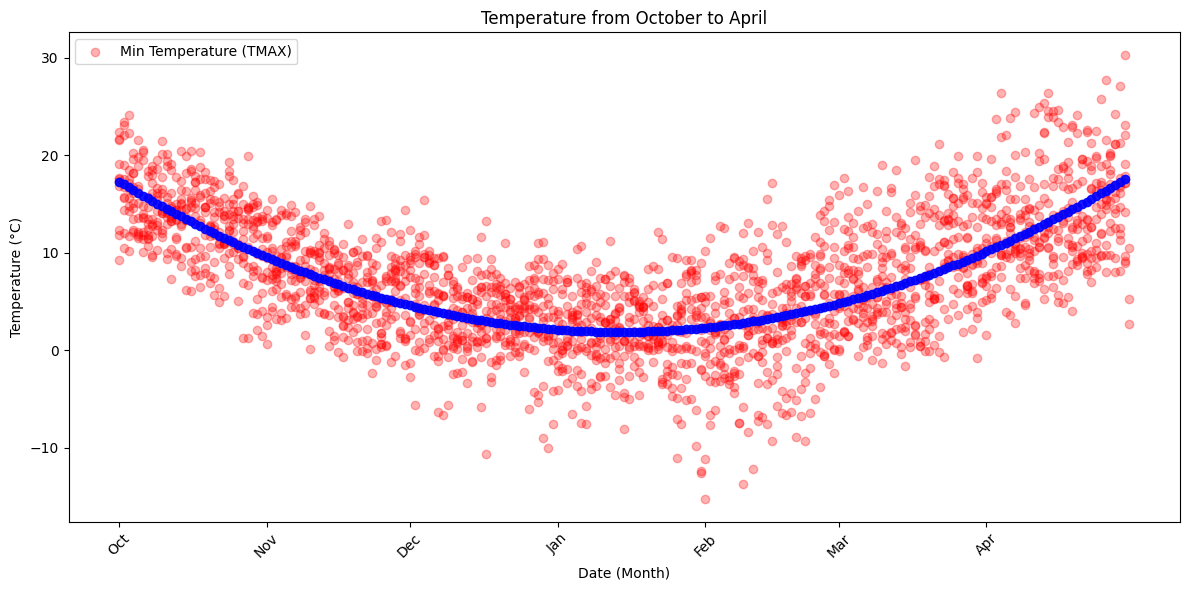

In [25]:
def compute_and_plot(X, w, b, y_mu, y_sigma, x_plot_labels, color, alpha=0.5):
    X1 = X[:, 0]
    X2 = X[:, 1]
    y_pred = w[0] * X1 + w[1] * X2 + b
    y_pred_normalized = normalize_back(y_pred, y_mu, y_sigma)

    x_labels_subset = x_plot_labels[:len(y_pred_normalized)]

    plt.scatter(x_labels_subset, y_pred_normalized, color=color, alpha=alpha)#, label="Predicted Temperature")


def plot_main_model(X, w_trained, b_trained, x_mu, x_sigma, y_mu, y_sigma, daily_training_data):
    x_plot = normalize_back(X[:, 0], x_mu, x_sigma)

    x_plot_labels = [f"{int(m):02d}-{int(d):02d}" for m, d in [(get_month_day(daily_training_data, round(i) - 1)) for i in x_plot]]
    months = ['10-01', '11-01', '12-01', '01-01', '02-01', '03-01', '04-01']
    month_labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']
    tick_indices = [i for i, label in enumerate(x_plot_labels) if label in months]
    plt.figure(figsize=(12, 6))

    df_filtered_later = get_data(1950, 1960)
    plt.scatter(df_filtered_later['MONTH_DAY'], df_filtered_later['TMAX'], color='red', alpha=0.3, label='Min Temperature (TMAX)')
    compute_and_plot(X, w_trained, b_trained, y_mu, y_sigma, x_plot_labels, 'blue', alpha=0.9)

    plt.xlabel("Date (Month)")
    plt.ylabel("Temperature (°C)")
    plt.title("Temperature from October to April")
    plt.legend()

    plt.xticks([x_plot_labels[i] for i in tick_indices], month_labels)

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_main_model(X, w_trained, b_trained, x_mu, x_sigma, y_mu, y_sigma, daily_training_data)



In [17]:
def compute_first_april(X, w, b,  y_mu, y_sigma):
    first_april = X[183]
    temp_apr = w[0] * first_april[0] + w[1] * first_april[1] + b
    return (temp_apr * y_sigma + y_mu), 183

In [18]:
first_april_temp, first_april_index = compute_first_april(X, w_trained, b_trained, y_mu, y_sigma)

In [31]:
data_1990 = get_single_season_data(1990)
(_, _, _), (new_y, new_y_mu, new_y_sigma) = get_training_data(data_1990, 'TMAX')


In [32]:
def check_difference(X, Y, y_mu, y_sigma, x_mu, x_sigma,
                     first_april_temp, first_april_index):
    difference = []
    W = []
    B = []
    for i in range(1, 106):
        w, b = train_model(X[:106+i], Y[:106+i])
        if i < 10:
            continue
        diff = []
        if i % 10 == 0 or i == 105:
            W.append(w)
            B.append(b)
        for j in range(0, i):
            temp_prediction = w[0] * X[106+j, 0] + w[1] * X[106+j, 1] + b
            temp_prediction = temp_prediction * y_sigma + y_mu

            if temp_prediction > first_april_temp:
                x = normalize_back(X[106+j], x_mu, x_sigma)
                diff.append(round(x[0]) - first_april_index)
        if diff:
            difference.append(diff)
    return difference, W, B

In [33]:
difference, W, B = check_difference(X, new_y, new_y_mu, new_y_sigma, x_mu, x_sigma,first_april_temp, first_april_index)

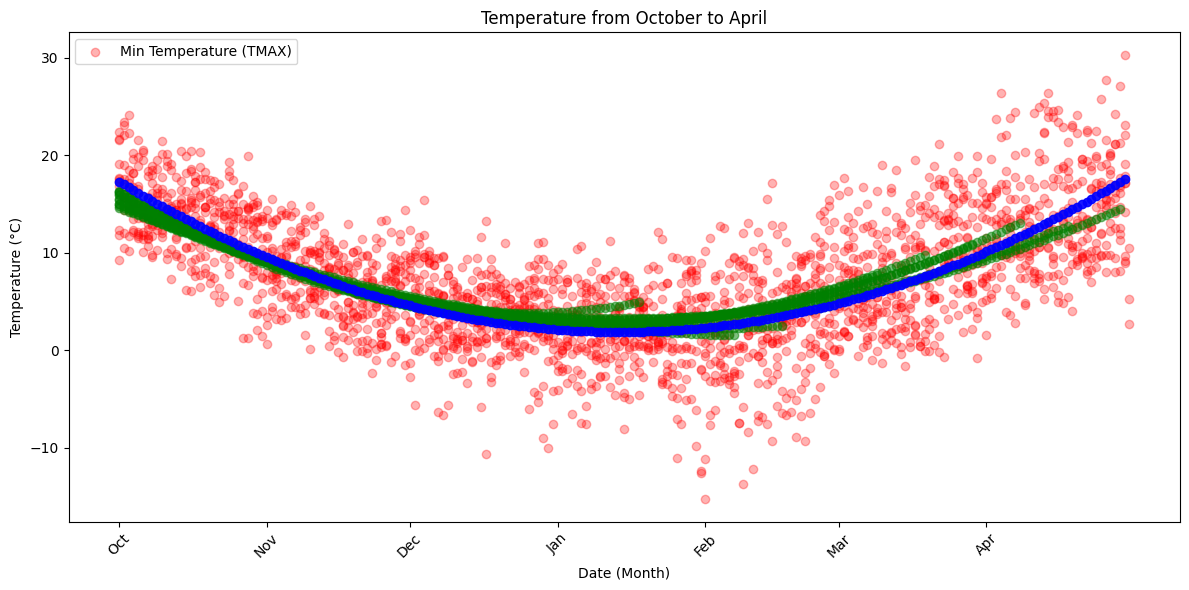

In [34]:
def plot_models(X, w_trained, b_trained, x_mu, x_sigma, y_mu, y_sigma, daily_training_data, W, B):
    x_plot = normalize_back(X[:, 0], x_mu, x_sigma)

    x_plot_labels = [f"{int(m):02d}-{int(d):02d}" for m, d in [(get_month_day(daily_training_data, round(i) - 1)) for i in x_plot]]
    months = ['10-01', '11-01', '12-01', '01-01', '02-01', '03-01', '04-01']
    month_labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']
    tick_indices = [i for i, label in enumerate(x_plot_labels) if label in months]
    plt.figure(figsize=(12, 6))

    df_filtered_later = get_data(1950, 1960)
    plt.scatter(df_filtered_later['MONTH_DAY'], df_filtered_later['TMAX'], color='red', alpha=0.3, label='Min Temperature (TMAX)')


    indices = [i for i in range(110, 210, 10)]
    indices.append(211)
    for i in range(len(W)):
        compute_and_plot(X[:indices[i]], W[i], B[i], y_mu, y_sigma, x_plot_labels, 'green', alpha=0.5)

    compute_and_plot(X, w_trained, b_trained, y_mu, y_sigma, x_plot_labels, 'blue', alpha=0.9)

    plt.xlabel("Date (Month)")
    plt.ylabel("Temperature (°C)")
    plt.title("Temperature from October to April")
    plt.legend()

    plt.xticks([x_plot_labels[i] for i in tick_indices], month_labels)

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_models(X, w_trained, b_trained, x_mu, x_sigma, y_mu, y_sigma, daily_training_data, W, B)